In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
train=pd.read_csv("train.csv")

In [7]:
train

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70,27.9
396,396,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13,24.7
397,397,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99,19.5
398,398,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09,20.4


In [8]:
test=pd.read_csv("test.csv")

In [9]:
test

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56
101,101,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11
102,102,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28
103,103,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05


In [10]:
print(train.shape)
print(test.shape)

(400, 15)
(105, 14)


In [12]:
print("Null values in Training dataset:",train.isna().sum().sum())
print("Null values in Testing dataset:",test.isna().sum().sum())

Null values in Training dataset: 0
Null values in Testing dataset: 0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       105 non-null    int64  
 1   CRIM     105 non-null    float64
 2   ZN       105 non-null    float64
 3   INDUS    105 non-null    float64
 4   CHAS     105 non-null    int64  
 5   NOX      105 non-null    float64
 6   RM       105 non-null    float64
 7   AGE      105 non-null    float64
 8   DIS      105 non-null    float64
 9   RAD      105 non-null    int64  
 10  TAX      105 non-null    float64
 11  PTRATIO  105 non-null    float64
 12  B        105 non-null    float64
 13  LSTAT    105 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.6 KB


In [15]:
X_train=train.drop(columns=["MEDV"])
y_train=train["MEDV"]

In [16]:
model=LinearRegression().fit(X_train,y_train)

In [18]:
X_test=test
y_test=model.predict(X_test)

In [19]:
print(model.score(X_test,y_test))

1.0


In [21]:
output={"id":test["ID"],"Output":y_test}
Output_data=pd.DataFrame(output)

In [22]:
Output_data.to_csv("output.csv")

Gradient Descent

In [23]:
X=Output_data["id"]
y=Output_data["Output"]

In [24]:
#cost function 
def single_point_cost(x,y,w):   
    y_pred= w * x
    cost=( y_pred - y) **2  #linear regression
    return cost
#calculating derivative of each point
#grad function
def grad(x,y,w,):
    grad_w=2 * x * ((w * x) - y ) # derevative with respect to x
    return grad_w

In [25]:
w=0 # here we have  only one parameter
gamma=0.000001 #learning rate
all_costs=[]
for k in range(60):
    cost=0
    for i in range(len(X)):
        a=single_point_cost(X[i],y[i],w)
        cost+=a
    
    cost1=cost/len(X)  #average cost
    all_costs.append(cost1)
    grad_w=0
    for j in range(len(X)):
        b=grad(X[j],y[j],w)
        grad_w+=b
    grad_w1=grad_w/len(X)  #avearge grad
    w= w -  (gamma * grad_w1)  # in batch gradient descent update happens only one time

In [26]:
import matplotlib.pyplot as plt

optimal value w is  0.11287143767763236


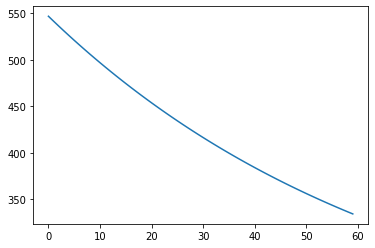

In [27]:
print("optimal value w is ",w) #optimal value of w
epochs=np.arange(60)
plt.plot(epochs,all_costs)

optimal value w is  0.2964686726776663


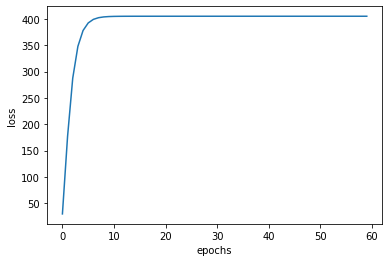

In [28]:
all_costs23=[]
w=0
gamma=0.000001
for k in range(60):
    for i in range(len(X)):
        cost21=single_point_cost(X[i],y[i],w)
        grad_w21=grad(X[i],y[i],w)
        w= w- (gamma * grad_w21) # in sgd update takes place after every point
    all_costs23.append(cost21)

print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs23)

optimal value w is  0.22030569406983794


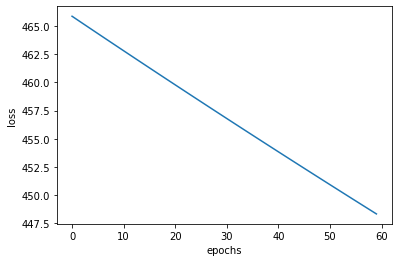

In [29]:
# let our batch size = 5
#so we will have 2 batches because n=10  and updates will happen 2 times 
w=0
gamma=0.000001
batch_size= 5
all_costs41=[]
for k in range(60):
    for j in range(int(len(X)/batch_size)):
        cost4=0
        for i in range(batch_size):
            z1=single_point_cost(X[i],y[i],w)
            cost4+=z1
        if j==1:
            all_costs41.append(cost4/batch_size) #avearge cost of that batch
        grad_w41=0
        for n in range(batch_size):
            f1=grad(X[i],y[i],w)
            grad_w41+=f1
    
        grad_w42=grad_w41/batch_size  #average grad of that function

        w= w- (gamma * grad_w42)  # update takes place after every batch

print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs41)

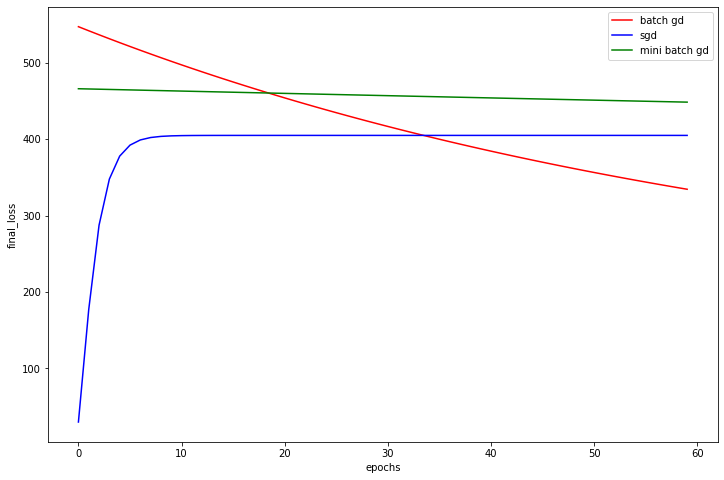

In [30]:
plt.figure(figsize=(12,8))
plt.plot(epochs,all_costs,c='r',label="batch gd")
plt.plot(epochs,all_costs23,c='b',label="sgd")
plt.plot(epochs,all_costs41,c='g',label="mini batch gd")
plt.xlabel("epochs")
plt.ylabel("final_loss")
plt.legend()
plt.show()